In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import the marketing data
#Kaggle (https://www.kaggle.com/jackdaoud/marketing-data)
mk = pd.read_csv ("marketing_data.csv")
mk.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/2014,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/2014,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/2014,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/2014,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [7]:
mk.shape

(2240, 28)

In [8]:
#More info
mk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [9]:
mk.columns.values

array(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response',
       'Complain', 'Country'], dtype=object)

In [10]:
mk_1 = mk.rename(columns={' Income ': 'Income'})
mk_1.columns.values

array(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response',
       'Complain', 'Country'], dtype=object)

In [11]:
#Replace $ with numeric value
mk_2 = mk_1.copy()
mk_2['Income'] = mk_2['Income'].str.replace('$', '').str.replace(',','')
mk_2['Income'] = pd.to_numeric(mk_2['Income'])
mk_2['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [12]:
mk_2.Income.value_counts()
mk_2.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [13]:
#Select duplicate rows except first occurrence based on all columns
chk = mk_2[mk_2.duplicated()]
chk

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country


In [14]:
#In case you want to remove
mk_2= mk_2.drop_duplicates( )
mk_2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/2014,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/2013,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/2012,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [15]:
#Checking for presence of NaN
mk_2.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [45]:
#Replace missing value with average value
mk_2.mean()
mk_2 = mk_2.fillna(mk_2.mean())
mk_2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,age_group,income_group,recency_group,children
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,0,0,1,0,SP,44,age_40-60,inc75-100K,Recency_1MO,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,0,1,1,0,CA,53,age_40-60,inc50-75K,Recency_1MO,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,0,0,0,0,US,56,age_40-60,inc50-75K,Recency_1MO,1
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/2014,0,10,...,0,0,0,0,AUS,47,age_40-60,inc25-50K,Recency_1MO,2
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/2014,0,6,...,0,0,1,0,SP,25,age_20-40,inc<25K,Recency_1MO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/2013,99,372,...,0,0,0,0,US,38,age_20-40,inc50-75K,Recency_>3MO,1
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,0,0,0,0,SP,37,age_20-40,inc25-50K,Recency_>3MO,1
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/2012,99,185,...,0,0,0,0,SP,38,age_20-40,inc25-50K,Recency_>3MO,1
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,0,0,0,0,IND,36,age_20-40,inc50-75K,Recency_>3MO,0


In [46]:
mk_2.Income.describe()

count      2240.000000
mean      52247.251354
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [47]:
#Include todays date into the dataframe and classify age into four tiers
mk_2['age'] = (2014 - mk_2['Year_Birth'])

a1 = [
    (mk_2['age'] <= 20),
    (mk_2['age'] > 20) & (mk_2['age'] <= 40),
    (mk_2['age'] > 40) & (mk_2['age'] <= 60),
    (mk_2['age'] > 60) & (mk_2['age'] <= 80),
    (mk_2['age'] > 80) & (mk_2['age'] <= 100),
    (mk_2['age'] > 100)
    ]

a2 = ['age_<20', 'age_20-40', 'age_40-60', 'age_60-80', 'age_80-100','age_>100']
      
mk_2['age_group'] = np.select(a1, a2)
mk_2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,age_group,income_group,recency_group,children
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,0,0,1,0,SP,44,age_40-60,inc75-100K,Recency_1MO,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,0,1,1,0,CA,53,age_40-60,inc50-75K,Recency_1MO,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,0,0,0,0,US,56,age_40-60,inc50-75K,Recency_1MO,1
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/2014,0,10,...,0,0,0,0,AUS,47,age_40-60,inc25-50K,Recency_1MO,2
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/2014,0,6,...,0,0,1,0,SP,25,age_20-40,inc<25K,Recency_1MO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/2013,99,372,...,0,0,0,0,US,38,age_20-40,inc50-75K,Recency_>3MO,1
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,0,0,0,0,SP,37,age_20-40,inc25-50K,Recency_>3MO,1
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/2012,99,185,...,0,0,0,0,SP,38,age_20-40,inc25-50K,Recency_>3MO,1
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,0,0,0,0,IND,36,age_20-40,inc50-75K,Recency_>3MO,0


In [48]:
#Check frequency of age groups
mk_21_AG = mk_2.age_group.value_counts()
mk_21_AG

age_40-60    1124
age_20-40     837
age_60-80     266
age_<20        10
age_>100        3
Name: age_group, dtype: int64

In [49]:
mk_22_AG = mk_2.groupby(['age_group'])['age_group'].count().reset_index(name='Count').sort_values(['age_group'], ascending=True)
mk_22_AG

,age_group,Count
0,age_20-40,837
1,age_40-60,1124
2,age_60-80,266
3,age_<20,10
4,age_>100,3


In [50]:
#Create income groups
a1 = [
    (mk_2['Income'] <= 25000),
    (mk_2['Income'] > 25000) & (mk_2['Income'] <= 50000),
    (mk_2['Income'] > 50000) & (mk_2['Income'] <= 75000),
    (mk_2['Income'] > 75000) & (mk_2['Income'] <= 100000),
    (mk_2['Income'] > 100000)
    ]
a2 = ['inc<25K', 'inc25-50K', 'inc50-75K', 'inc75-100K', 'inc>100K']

mk_2['income_group'] = np.select(a1, a2)
mk_2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,age_group,income_group,recency_group,children
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,0,0,1,0,SP,44,age_40-60,inc75-100K,Recency_1MO,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,0,1,1,0,CA,53,age_40-60,inc50-75K,Recency_1MO,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,0,0,0,0,US,56,age_40-60,inc50-75K,Recency_1MO,1
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/2014,0,10,...,0,0,0,0,AUS,47,age_40-60,inc25-50K,Recency_1MO,2
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/2014,0,6,...,0,0,1,0,SP,25,age_20-40,inc<25K,Recency_1MO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/2013,99,372,...,0,0,0,0,US,38,age_20-40,inc50-75K,Recency_>3MO,1
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,0,0,0,0,SP,37,age_20-40,inc25-50K,Recency_>3MO,1
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/2012,99,185,...,0,0,0,0,SP,38,age_20-40,inc25-50K,Recency_>3MO,1
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,0,0,0,0,IND,36,age_20-40,inc50-75K,Recency_>3MO,0


In [51]:
mk_21_IG = mk_2.income_group.value_counts()
mk_21_IG

inc50-75K     821
inc25-50K     818
inc75-100K    346
inc<25K       242
inc>100K       13
Name: income_group, dtype: int64

In [52]:
mk_22_IG = mk_2.groupby(['income_group'])['income_group'].count().reset_index(name='Count').sort_values(['income_group'], ascending=True)
mk_22_IG

,income_group,Count
0,inc25-50K,818
1,inc50-75K,821
2,inc75-100K,346
3,inc<25K,242
4,inc>100K,13


In [53]:
a1 = [
    (mk_2['Recency'] <= 30),
    (mk_2['Recency'] > 30) & (mk_2['Recency'] <= 60),
    (mk_2['Recency'] > 60) & (mk_2['Recency'] <= 90),
    (mk_2['Recency'] > 90)
    ]
a2 = ['Recency_1MO', 'Recency_12MO', 'Recency_3MO','Recency_>3MO']
mk_2['recency_group'] = np.select(a1, a2)
mk_2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,age_group,income_group,recency_group,children
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,0,0,1,0,SP,44,age_40-60,inc75-100K,Recency_1MO,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,0,1,1,0,CA,53,age_40-60,inc50-75K,Recency_1MO,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,0,0,0,0,US,56,age_40-60,inc50-75K,Recency_1MO,1
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/2014,0,10,...,0,0,0,0,AUS,47,age_40-60,inc25-50K,Recency_1MO,2
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/2014,0,6,...,0,0,1,0,SP,25,age_20-40,inc<25K,Recency_1MO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/2013,99,372,...,0,0,0,0,US,38,age_20-40,inc50-75K,Recency_>3MO,1
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,0,0,0,0,SP,37,age_20-40,inc25-50K,Recency_>3MO,1
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/2012,99,185,...,0,0,0,0,SP,38,age_20-40,inc25-50K,Recency_>3MO,1
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,0,0,0,0,IND,36,age_20-40,inc50-75K,Recency_>3MO,0


In [35]:
mk_21_RG = mk_2.recency_group.value_counts()
mk_21_RG

Recency_1MO     724
Recency_3MO     664
Recency_12MO    654
Recency_>3MO    198
Name: recency_group, dtype: int64

In [37]:
mk_22_RG = mk_2.groupby(['recency_group'])['recency_group'].count().reset_index(name='Count').sort_values(['recency_group'], ascending=True)
mk_22_RG

,recency_group,Count
0,Recency_12MO,654
1,Recency_1MO,724
2,Recency_3MO,664
3,Recency_>3MO,198


In [60]:
mk_2['children'] = mk_2['Kidhome'] + mk_2['Teenhome']
mk_2['total_spend'] = mk_2['MntWines'] + mk_2['MntFruits'] + mk_2['MntMeatProducts'] + mk_2['MntFishProducts'] + mk_2['MntSweetProducts'] + mk_2['MntGoldProds']
mk_2['num_purchases'] = mk_2['NumDealsPurchases'] + mk_2['NumWebPurchases'] + mk_2['NumCatalogPurchases'] + mk_2['NumStorePurchases']
mk_2['cmp_accepted'] = mk_2['AcceptedCmp3'] + mk_2['AcceptedCmp4'] + mk_2['AcceptedCmp5'] + mk_2['AcceptedCmp1'] + mk_2['AcceptedCmp2']

In [62]:
mk_2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Country,age,age_group,income_group,recency_group,children,total_spend,num_purchases,cmp_accepted
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,0,SP,44,age_40-60,inc75-100K,Recency_1MO,0,1190,15,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,0,CA,53,age_40-60,inc50-75K,Recency_1MO,0,577,18,1
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,0,US,56,age_40-60,inc50-75K,Recency_1MO,1,251,11,0
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/2014,0,10,...,0,AUS,47,age_40-60,inc25-50K,Recency_1MO,2,11,4,0
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/2014,0,6,...,0,SP,25,age_20-40,inc<25K,Recency_1MO,1,91,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/2013,99,372,...,0,US,38,age_20-40,inc50-75K,Recency_>3MO,1,689,20,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,0,SP,37,age_20-40,inc25-50K,Recency_>3MO,1,55,5,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/2012,99,185,...,0,SP,38,age_20-40,inc25-50K,Recency_>3MO,1,309,14,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,0,IND,36,age_20-40,inc50-75K,Recency_>3MO,0,1383,20,0


In [63]:
mk_2_CH = mk_2.children.value_counts()
mk_2_CH

1    1128
0     638
2     421
3      53
Name: children, dtype: int64

In [64]:
mk_2_CA = mk_2.cmp_accepted.value_counts()
mk_2_CA

0    1777
1     325
2      83
3      44
4      11
Name: cmp_accepted, dtype: int64

In [66]:
#Creating child status and deal status columns
mk_2.loc[(mk_2['children'] > 0), 'child_status'] = "Yes"
mk_2.loc[(mk_2['children'] < 1), 'child_status'] = "No"
mk_2.loc[(mk_2['cmp_accepted'] > 0), 'cmp_staus'] = 1
mk_2.loc[(mk_2['cmp_accepted'] < 1), 'cmp_staus'] = 0
#Add dummy column
mk_2['dummy'] = 1
mk_2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,age_group,income_group,recency_group,children,total_spend,num_purchases,cmp_accepted,child_status,cmp_staus,dummy
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,age_40-60,inc75-100K,Recency_1MO,0,1190,15,0,No,0.0,1
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,age_40-60,inc50-75K,Recency_1MO,0,577,18,1,No,1.0,1
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,age_40-60,inc50-75K,Recency_1MO,1,251,11,0,Yes,0.0,1
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/2014,0,10,...,age_40-60,inc25-50K,Recency_1MO,2,11,4,0,Yes,0.0,1
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/2014,0,6,...,age_20-40,inc<25K,Recency_1MO,1,91,8,1,Yes,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/2013,99,372,...,age_20-40,inc50-75K,Recency_>3MO,1,689,20,0,Yes,0.0,1
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,age_20-40,inc25-50K,Recency_>3MO,1,55,5,0,Yes,0.0,1
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/2012,99,185,...,age_20-40,inc25-50K,Recency_>3MO,1,309,14,0,Yes,0.0,1
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,age_20-40,inc50-75K,Recency_>3MO,0,1383,20,0,No,0.0,1


In [69]:
chk = mk_2.Marital_Status.value_counts()
chk

chk = mk_2.loc[mk_2.Marital_Status == "Alone", "marital_status"] = "Unknown"
chk = mk_2.loc[mk_2.Marital_Status == "Alone", "marital_status"] = "Unknown"
chk = mk_2.loc[mk_2.Marital_Status == "YOLO", "marital_status"] = "Unknown"
chk = mk_2.loc[mk_2.Marital_Status == "Absurd", "marital_status"] = "Unknown"
chk = mk_2.loc[mk_2.Marital_Status == "Married", "marital_status"] = "Married"
chk = mk_2.loc[mk_2.Marital_Status == "Together", "marital_status"] = "Together"
chk = mk_2.loc[mk_2.Marital_Status == "Single", "marital_status"] = "Single"
chk = mk_2.loc[mk_2.Marital_Status == "Divorced", "marital_status"] = "Divorced"
chk = mk_2.loc[mk_2.Marital_Status == "Widow", "marital_status"] = "Widow"

In [74]:
mk_2.drop('Marital_Status', axis=1, inplace=True)
mk_2

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,income_group,recency_group,children,total_spend,num_purchases,cmp_accepted,child_status,cmp_staus,dummy,marital_status
0,1826,1970,Graduation,84835.0,0,0,6/16/2014,0,189,104,...,inc75-100K,Recency_1MO,0,1190,15,0,No,0.0,1,Divorced
1,1,1961,Graduation,57091.0,0,0,6/15/2014,0,464,5,...,inc50-75K,Recency_1MO,0,577,18,1,No,1.0,1,Single
2,10476,1958,Graduation,67267.0,0,1,5/13/2014,0,134,11,...,inc50-75K,Recency_1MO,1,251,11,0,Yes,0.0,1,Married
3,1386,1967,Graduation,32474.0,1,1,5/11/2014,0,10,0,...,inc25-50K,Recency_1MO,2,11,4,0,Yes,0.0,1,Together
4,5371,1989,Graduation,21474.0,1,0,4/8/2014,0,6,16,...,inc<25K,Recency_1MO,1,91,8,1,Yes,1.0,1,Single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,66476.0,0,1,3/7/2013,99,372,18,...,inc50-75K,Recency_>3MO,1,689,20,0,Yes,0.0,1,Divorced
2236,5263,1977,2n Cycle,31056.0,1,0,1/22/2013,99,5,10,...,inc25-50K,Recency_>3MO,1,55,5,0,Yes,0.0,1,Married
2237,22,1976,Graduation,46310.0,1,0,12/3/2012,99,185,2,...,inc25-50K,Recency_>3MO,1,309,14,0,Yes,0.0,1,Divorced
2238,528,1978,Graduation,65819.0,0,0,11/29/2012,99,267,38,...,inc50-75K,Recency_>3MO,0,1383,20,0,No,0.0,1,Married


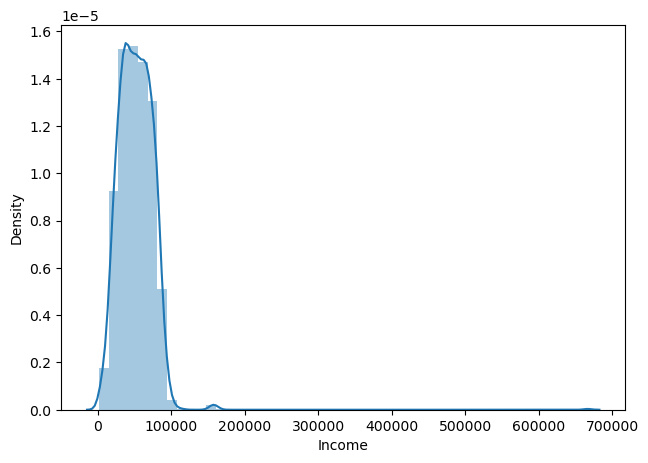

<AxesSubplot:xlabel='Income'>

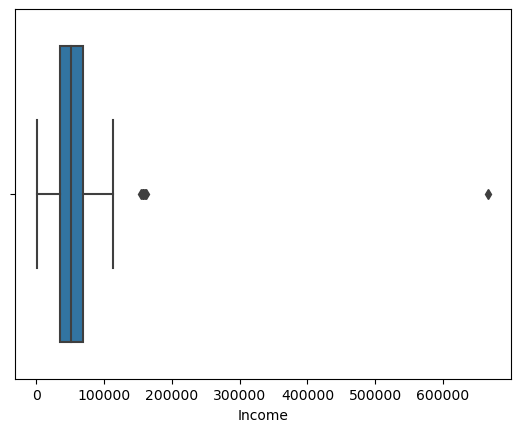

In [75]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(mk_2['Income'])
plt.show()
sns.boxplot(mk_2['Income'])

In [80]:
#Compute IQR
p25 = mk_2['Income'].quantile(0.25)
p75 = mk_2['Income'].quantile(0.75)
iqr = p75 - p25
ul = p75 + 4 * iqr
ll = p25 - 4 * iqr
#Check if there is an outlier
mk_2[mk_2['Income'] > ul]

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,income_group,recency_group,children,total_spend,num_purchases,cmp_accepted,child_status,cmp_staus,dummy,marital_status
527,9432,1977,Graduation,666666.0,1,0,6/2/2013,23,9,14,...,inc>100K,Recency_1MO,1,62,11,0,Yes,0.0,1,Together


In [81]:
#Check if there is an outlier
mk_2[mk_2['Income'] < ll]

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,income_group,recency_group,children,total_spend,num_purchases,cmp_accepted,child_status,cmp_staus,dummy,marital_status


In [82]:
#Remove outlier
mk_3 = mk_2[mk_2['Income'] < ul]
mk_3.shape

(2239, 39)

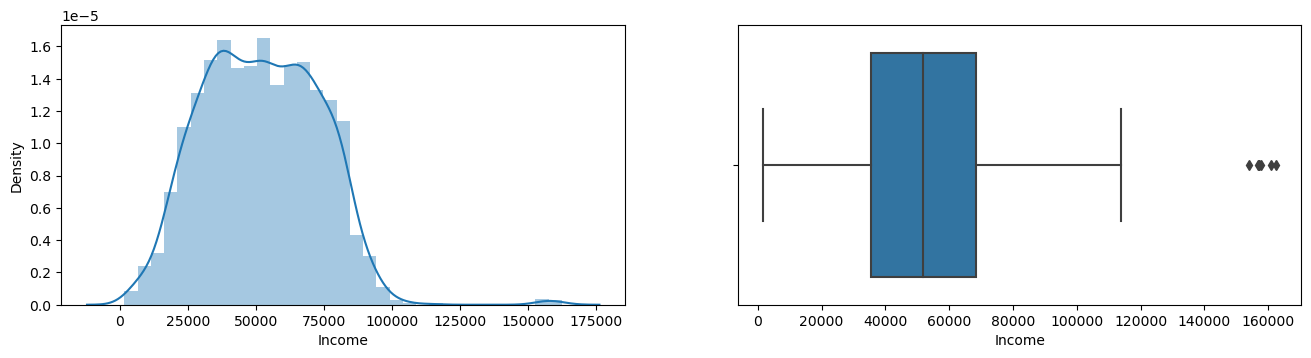

In [83]:
#Check distribution of new data
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(mk_3['Income'])
plt.subplot(2,2,2)
sns.boxplot(mk_3['Income'])
plt.show()

In [85]:
#Count unique values in each column
mk_3.nunique(dropna=False)

ID                     2239
Year_Birth               59
Education                 5
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
age                      59
age_group                 5
income_group              5
recency_group             4
children                  4
total_spend            1054
num_purchases            39
cmp_accepted              5
child_status        

In [87]:
mk_3.shape

(2239, 39)

In [89]:
#Export
mk_3.to_excel (r'mk_processed.xlsx')

In [90]:
m = pd.read_excel (r'mk_processed.xlsx')
m.head()

,Unnamed: 0,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,income_group,recency_group,children,total_spend,num_purchases,cmp_accepted,child_status,cmp_staus,dummy,marital_status
0,0,1826,1970,Graduation,84835.0,0,0,6/16/2014,0,189,...,inc75-100K,Recency_1MO,0,1190,15,0,No,0,1,Divorced
1,1,1,1961,Graduation,57091.0,0,0,6/15/2014,0,464,...,inc50-75K,Recency_1MO,0,577,18,1,No,1,1,Single
2,2,10476,1958,Graduation,67267.0,0,1,5/13/2014,0,134,...,inc50-75K,Recency_1MO,1,251,11,0,Yes,0,1,Married
3,3,1386,1967,Graduation,32474.0,1,1,5/11/2014,0,10,...,inc25-50K,Recency_1MO,2,11,4,0,Yes,0,1,Together
4,4,5371,1989,Graduation,21474.0,1,0,4/8/2014,0,6,...,inc<25K,Recency_1MO,1,91,8,1,Yes,1,1,Single


Text(0.5, 1.0, 'Wine vs. Meat')

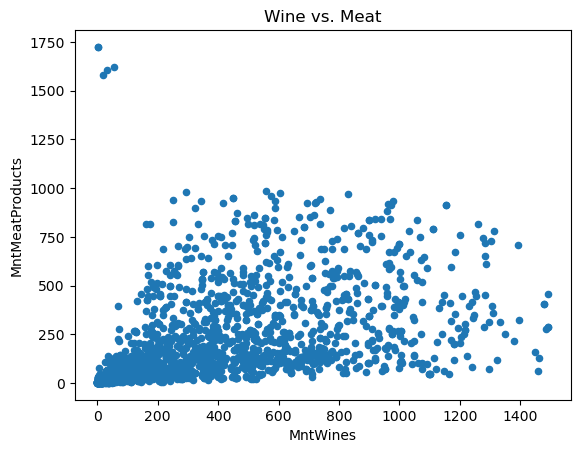

In [100]:
#scatter
scat = m.plot(x='MntWines', y='MntMeatProducts', kind='scatter')
scat.set_title('Wine vs. Meat')

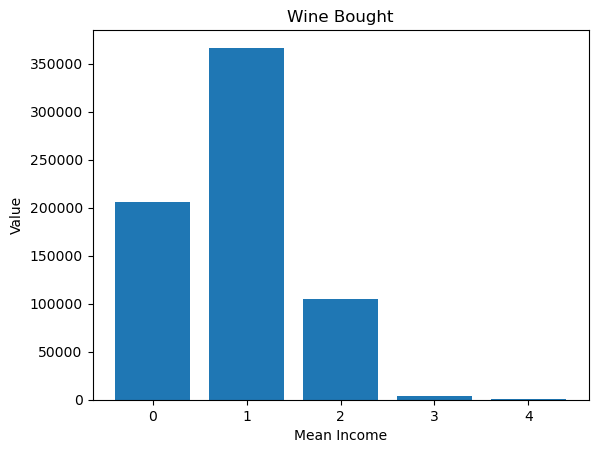

In [128]:
# Bar Plot

m1 = m.groupby(['age_group']).agg({'MntWines': "sum"}).rename(columns={'MntWines':'sum_Wine'})
m1

n = m1.sum_Wine
plt.bar(np.arange(len(n)), n)
plt.xlabel('Mean Income')
plt.ylabel('Value')
plt.title('Wine Bought')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x26a3b3101f0>,
 'caps': [<matplotlib.lines.Line2D at 0x26a3b310790>,
 'boxes': [<matplotlib.lines.Line2D at 0x26a3b300ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x26a3b310d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x26a3b31d040>],
 'means': []}

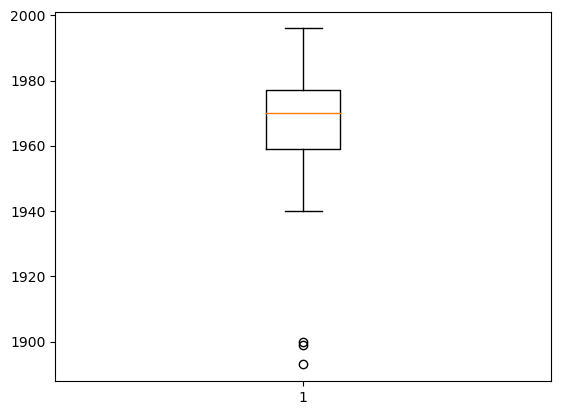

In [116]:
#boxplot
plt.boxplot(m['Year_Birth'])

(array([  3.,   0.,   0.,   0.,  16., 300., 541., 685., 505., 189.]),
 array([1893. , 1903.3, 1913.6, 1923.9, 1934.2, 1944.5, 1954.8, 1965.1,
        1975.4, 1985.7, 1996. ]),
 <BarContainer object of 10 artists>)

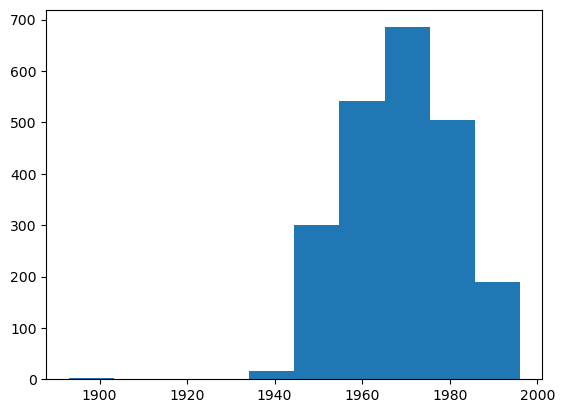

In [118]:
#histogram
plt.hist(m['Year_Birth'])

<AxesSubplot:ylabel='total_spend'>

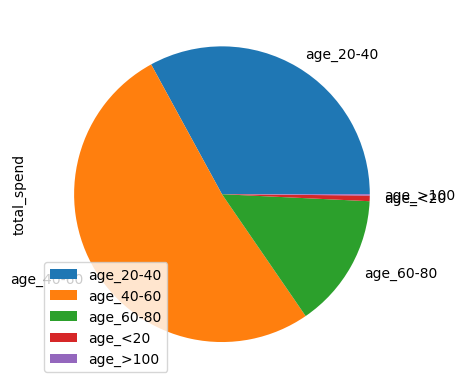

In [132]:
#pie chart
m.groupby(['age_group']).sum().plot(kind='pie', y='total_spend')

In [144]:
grouped = m.groupby('age_group').sum()[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'total_spend']]

grouped


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,total_spend
age_group,,,,,,,
age_20-40,205334,21737,132893,30528,22566,34055,447113
age_40-60,366449,29288,183785,41156,29674,50245,700597
age_60-80,104845,7511,53290,11641,7940,13733,198960
age_<20,3401,217,3407,606,372,313,8316
age_>100,778,150,575,118,68,251,1940


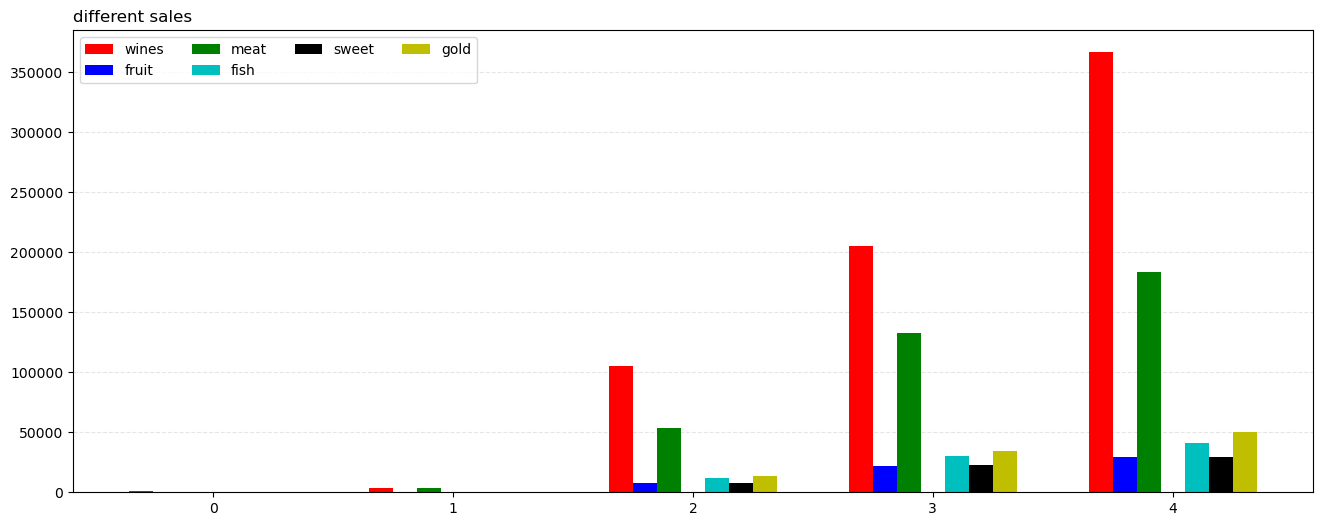

In [170]:
# side by siede bars
fig, ax = plt.subplots(1, figsize=(16, 6))

x = np.arange(0, len(grouped.index))

plt.bar(x - 0.3, grouped['MntWines'], width = 0.1, color = 'r')
plt.bar(x - 0.2, grouped['MntFruits'], width = 0.1, color = 'b')
plt.bar(x - 0.1, grouped['MntMeatProducts'], width = 0.1, color = 'g')
plt.bar(x + 0.1, grouped['MntFishProducts'], width = 0.1, color = 'c')
plt.bar(x + 0.2, grouped['MntSweetProducts'], width = 0.1, color = 'black')
plt.bar(x + 0.3, grouped['MntGoldProds'], width = 0.1, color = 'y')

# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('different sales', loc ='left')
plt.legend(['wines','fruit', 'meat', 'fish', 'sweet', 'gold'], loc='upper left', ncol = 4)
plt.show()

In [174]:
#SEABORN

In [4]:
m

NameError: name 'm' is not defined

Text(0, 0.5, 'Total Spend')

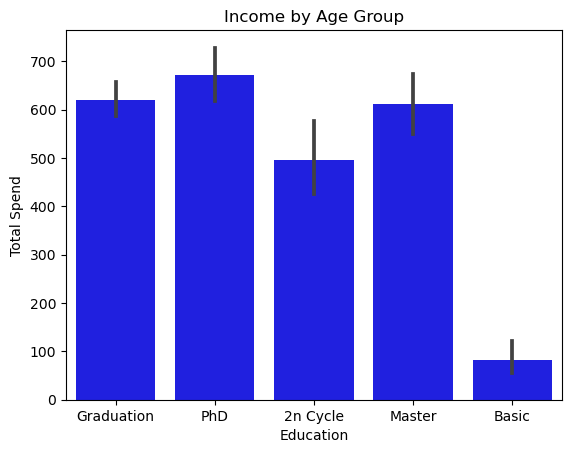

In [185]:
#bar chart
Education = m.Education
Total_Spend = m.total_spend
sns.barplot(x=Education,y=Total_Spend,color='blue')
plt.title('Income by Age Group')
plt.xlabel('Education')
plt.ylabel('Total Spend')

<AxesSubplot:xlabel='MntWines', ylabel='MntMeatProducts'>

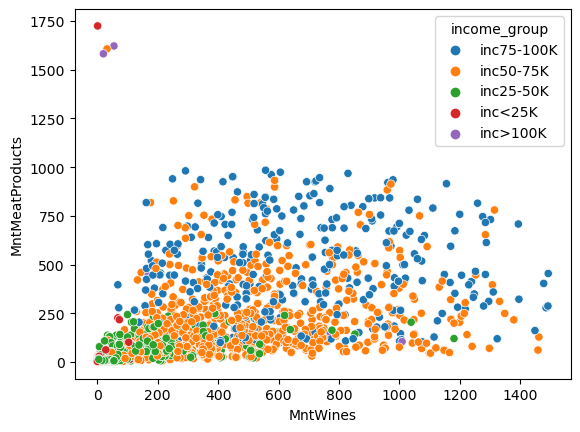

In [196]:
#scatter
sns.scatterplot(data = m, x="MntWines", y="MntMeatProducts", hue="income_group")

<AxesSubplot:xlabel='marital_status', ylabel='Income'>

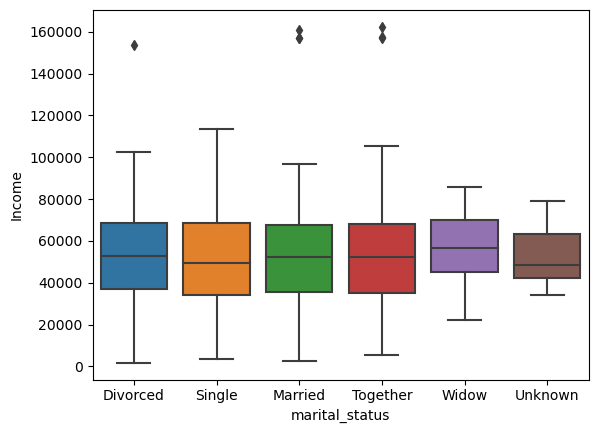

In [201]:
#boxplot
sns.boxplot(x='marital_status',y='Income',data=m)

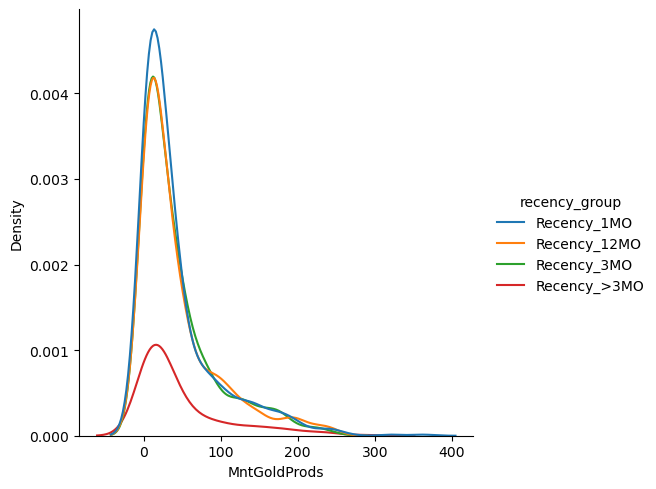

In [205]:
#lines
sns.displot(m, x="MntGoldProds", hue="recency_group", kind="kde")

<AxesSubplot:xlabel='Year_Birth', ylabel='total_spend'>

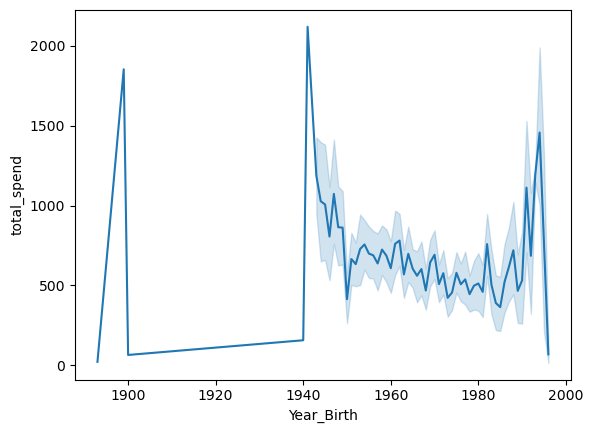

In [207]:
#single line
sns.lineplot(data=m, x="Year_Birth", y="total_spend")

<AxesSubplot:xlabel='Task', ylabel='Model'>

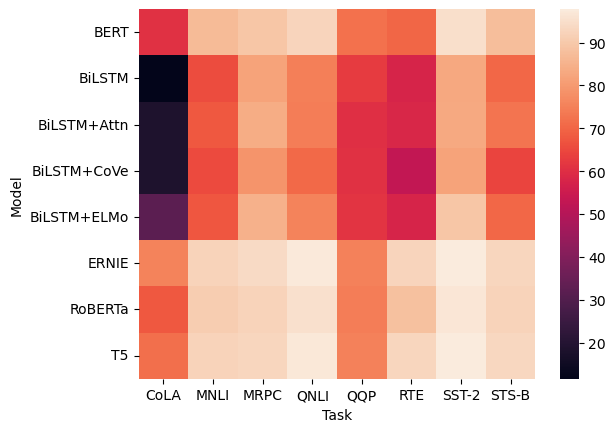

In [209]:
glue = sns.load_dataset("glue").pivot("Model", "Task", "Score")
sns.heatmap(glue)

In [211]:
glue

Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3
ERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0
RoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2
T5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1


<AxesSubplot:xlabel='marital_status', ylabel='Education'>

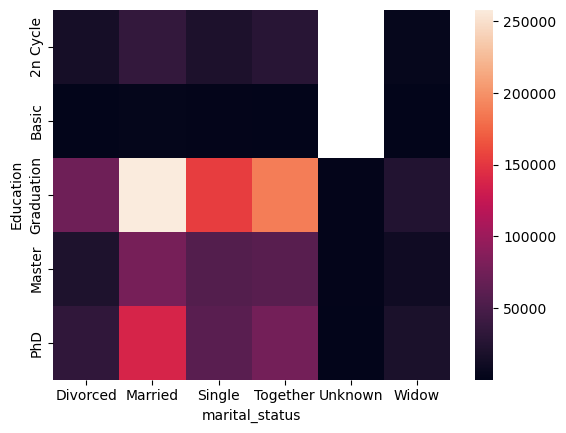

In [230]:
m_piv = m[['Education', 'marital_status', 'total_spend']]
m_piv2 = m_piv.pivot_table(index="Education",columns="marital_status",values="total_spend",aggfunc="sum")
sns.heatmap(m_piv2)